<a href="https://www.kaggle.com/code/jondelacruz/global-internet-accessibility-analysis?scriptVersionId=254830985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global Internet Accessibility Analysis

## 1. Objectives
This report presents the state of internet accessibility across the world by answering these specific questions:

1.	What are the **top five (5) countries** with the **highest internet use** (by population share)? How many **people had internet access** in those countries in **2019**?
2.	What are the **top five (5) countries** with the **highest internet use** for each of the following **regions**: **Africa Eastern and Southern**, **Africa Western and Central**, **Latin America & Caribbean**, **East Asia & Pacific**, **South Asia**, **North America**, and **European Union**? How do we **describe** these regions' **internet usage over time**?
3.	What are the **top five (5) countries** with the **most internet users**?
4.	What is the **correlation** between **internet usage** (population share) and **broadband subscriptions** for **2019**?

In [1]:
## ---------- Pre-installed Packages and Datasets

# Load required libraries
suppressMessages(library(tidyverse))
library(dplyr)
library(ggplot2)

# Read the datasets from the CSV files
internet <- read_csv("/kaggle/input/the-data-setlist/internet.csv", show_col_types = FALSE)
people <- read_csv("/kaggle/input/the-data-setlist/people.csv", show_col_types = FALSE)
broadband <- read_csv("/kaggle/input/the-data-setlist/broadband.csv", show_col_types = FALSE)

In [2]:
# View the 'internet' dataset
head(internet)
tail(internet)

Entity,Code,Year,Internet_Usage
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1990,0
Afghanistan,AFG,1991,0
Afghanistan,AFG,1992,0
Afghanistan,AFG,1993,0
Afghanistan,AFG,1994,0
Afghanistan,AFG,1995,0


Entity,Code,Year,Internet_Usage
<chr>,<chr>,<dbl>,<dbl>
Zimbabwe,ZWE,2012,12.00000
Zimbabwe,ZWE,2013,15.50000
Zimbabwe,ZWE,2014,16.36474
Zimbabwe,ZWE,2015,22.74282
Zimbabwe,ZWE,2016,23.11999
Zimbabwe,ZWE,2017,27.05549


In [3]:
# View the 'people' dataset
head(people)
tail(people)

Entity,Code,Year,Users
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1990,0
Afghanistan,AFG,1991,0
Afghanistan,AFG,1992,0
Afghanistan,AFG,1993,0
Afghanistan,AFG,1994,0
Afghanistan,AFG,1995,0


Entity,Code,Year,Users
<chr>,<chr>,<dbl>,<dbl>
Zimbabwe,ZWE,2015,3219232
Zimbabwe,ZWE,2016,3341464
Zimbabwe,ZWE,2017,3599269
Zimbabwe,ZWE,2018,3763048
Zimbabwe,ZWE,2019,3854006
Zimbabwe,ZWE,2020,4591211


In [4]:
# View the 'broadband' dataset
head(broadband)
tail(broadband)

Entity,Code,Year,Broadband_Subscriptions
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,2004,0.000808843
Afghanistan,AFG,2005,0.000857557
Afghanistan,AFG,2006,0.001891571
Afghanistan,AFG,2007,0.001844982
Afghanistan,AFG,2008,0.001803604
Afghanistan,AFG,2009,0.003521770


Entity,Code,Year,Broadband_Subscriptions
<chr>,<chr>,<dbl>,<dbl>
Zimbabwe,ZWE,2015,1.187053
Zimbabwe,ZWE,2016,1.217633
Zimbabwe,ZWE,2017,1.315694
Zimbabwe,ZWE,2018,1.406322
Zimbabwe,ZWE,2019,1.395818
Zimbabwe,ZWE,2020,1.368916


In [5]:
# Create a function for plotting time series in ggplot
plot_series <- function(
    data = NULL,
    x = NULL,
    xlabs = "",
    y = NULL,
    ylabs = "",
    group = NULL,
    title = "",
    title.s = 10,
    by = 10,
    colors = NULL
) {
    
    # Plot
    p <- data %>%
        ggplot(aes(x = !!sym(x), 
                   y = !!sym(y),
                   group = !!sym(group))) + 
        	geom_line(aes(color = !!sym(group)),
                    	  linewidth = 0.65) +
        	geom_point(aes(color = !!sym(group)), 
                           size = 0) +
        	theme(legend.position = "top",
                  legend.justification = -0.12,
                  legend.direction = "horizontal",
                  legend.key.size = unit(0, 'pt'),
                  legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                             color = "#65707C"),
                  legend.title = element_blank(),
                  legend.key = element_blank(),
                  axis.title = element_text(color = "#65707C",
                                            face = "bold"),
                  axis.text = element_text(color = "#65707C"),
                  axis.line = element_line(colour = "grey",
                                           linewidth = 0.5),
                  panel.grid.major = element_line(color = "grey",
                                                  linetype = "dashed",
                                                  linewidth = 0.25),
                  panel.background = element_blank(),
                  plot.title = element_text(color = "#65707C",
                                            hjust = 0.5,
                                            size = title.s,
                                            face = "bold")
                 ) +
        	labs(x = paste0("\n",xlabs), y = paste0(ylabs,"\n")) +
        	ggtitle(paste0("\n",title,"\n")) +
        	scale_x_continuous(expand = c(0.02, 0),
    						   limits = c(min(data[x]), 2019), 
    						   breaks = seq(min(data[x]), 2019, by = 4)
            ) +
        	scale_y_continuous(expand = c(0, 0),
    						   limits = c(min(data[y]), max(data[y])+4), 
    						   breaks = seq(min(data[y]), max(data[y]+4), by = by)
            ) +
            guides(color = guide_legend(
                       override.aes = list(
                				 shape = 15,
                				 size = 4,
                                 linetype = "blank"
                       )
                   )
            )
    
    if (!is.null(colors)) {
        p <- p + scale_color_manual(values = colors)    
    }

    print(p)
}

# Create a function for plotting bar graphs in ggplot
plot_bar <- function(
    data = NULL,
    group = "",
    xlabs = "",
    num = "",
    ylabs = "",
    title = "",
    title.s = 10
) {
    ggplot(data, aes(y = fct_reorder(!!sym(group), !!sym(num)), x = !!sym(num))) + 
    geom_col(fill = "#6568A0") +
	#coord_flip() +
	geom_text(aes(label = comma_format()(!!sym(num)), y = !!sym(group), x = !!sym(num)),
              hjust = -0.1,
              size = 3.0
    ) +
	theme_minimal() +
	theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          plot.title = element_text(face = "bold", size = title.s)
    ) +
    labs(x = paste0("\n",xlabs), y = paste0(ylabs,"\n")) +
    ggtitle(paste0("\n",title,"\n")) +
	scale_x_continuous(labels = scales::label_number(scale_cut = cut_short_scale()),
                       expand = expansion(mult = c(0.05, 0.30))
    )
}

## 2. Results and Discussion
### 2.1. Countries with the highest internet use by population share
Results show that **four (4)** out of the **top five (5) countries** with the **highest internet use** (by population share) are located in the **[Middle East](https://worldpopulationreview.com/country-rankings/middle-east-countries)**, which are **Bahrain**, **Qatar**, **Kuwait**, and the **United Arab Emirates (UAE)**.

_**Note**: The **most recent 2019 data** was used for this comparison._

Country,Internet_Usage
<chr>,<chr>
Bahrain,99.70%
Qatar,99.65%
Kuwait,99.54%
United Arab Emirates,99.15%
Denmark,98.05%


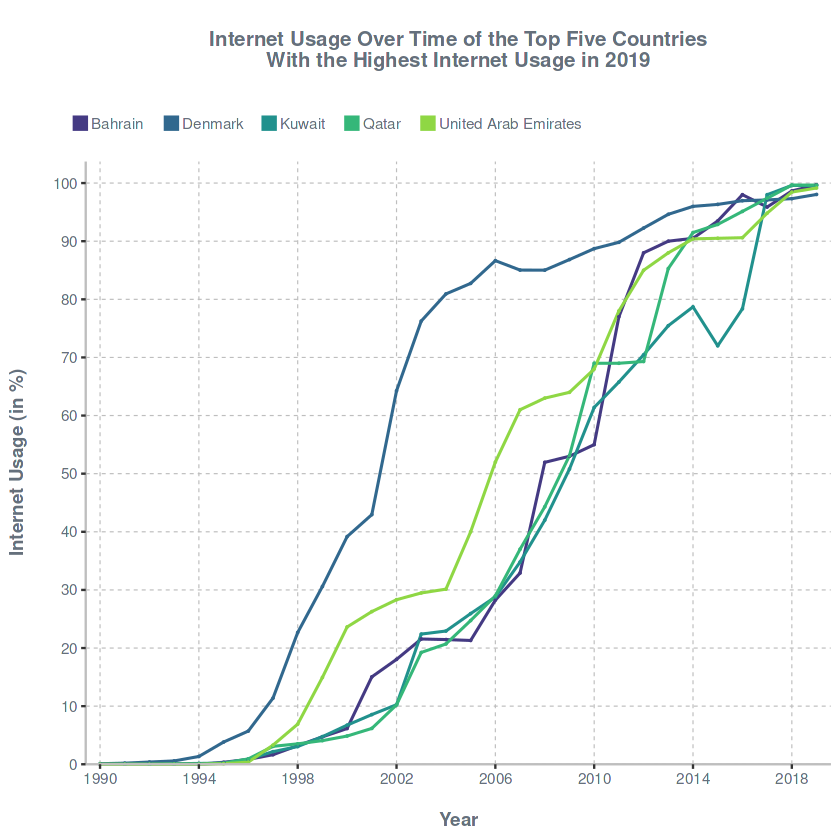

In [6]:
# Used for percentage values
suppressMessages(library(scales)) # required library

# Top 5 countries with the highest internet use by population share
top_five_internet_use <- internet %>%
    group_by(Entity) %>% 
	filter(Year == 2019) %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use

# Subset data for plot
plotData_top_five_internet_use <- internet %>% filter(Entity %in% top_five_internet_use$Country)

# Plot time series
plot_series(
    data = plotData_top_five_internet_use,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of the Top Five Countries\nWith the Highest Internet Usage in 2019",
    title.s = 12,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.1.1. Number of people that had internet access for these countries in 2019 
Among these countries, the **United Arab Emirates (UAE)** had the **highest number of internet users in 2019**.

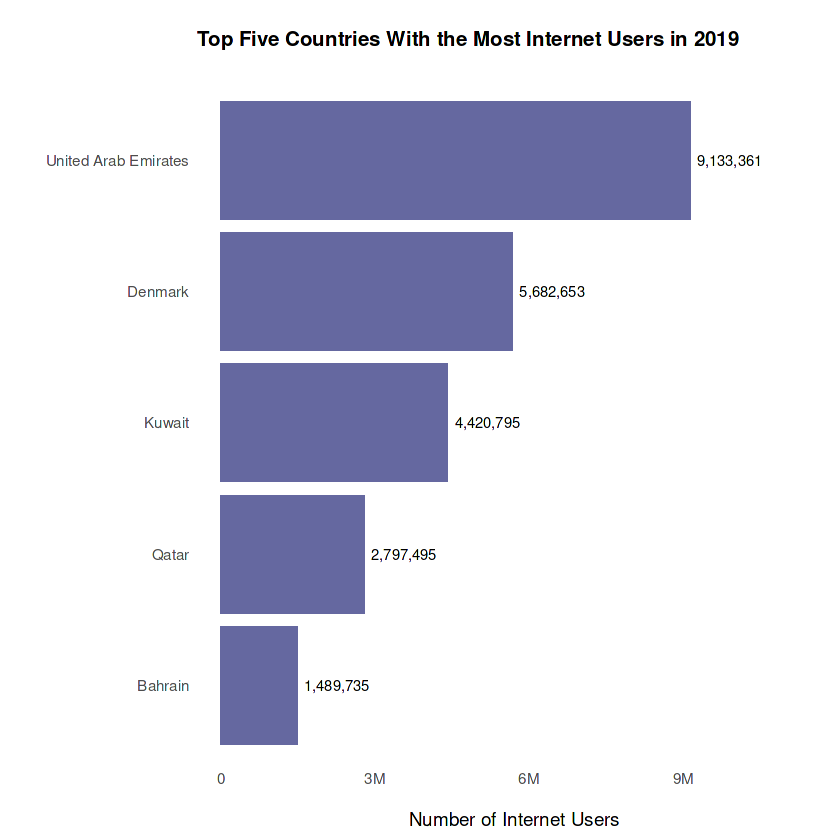

In [7]:
# Number of internet users in 2019 of the countries with the highest internet use by population share
top_five_internet_users_2019 <- people %>% 
	filter(Entity %in% top_five_internet_use$Country, Year == 2019) %>%
	arrange(desc(Users)) %>% 
	mutate(Users = comma_format()(Users)) %>%
	select(c("Entity", "Users")) %>%
	rename(Country = Entity, Number_of_Internet_Users = Users)

# Subset data for plot
barData_top_five_internet_users_2019 <- people %>%
	filter(Entity %in% top_five_internet_users_2019$Country, Year == 2019) %>%
	arrange(desc(Users)) %>%
	select(c("Entity", "Users"))

# Plot bar graph
plot_bar(
    data = barData_top_five_internet_users_2019, #NULL,
    group = "Entity",
    xlabs = "Number of Internet Users",
    num = "Users",
    ylabs ="",
    title = "Top Five Countries With the Most Internet Users in 2019",
    title.s = 12
)

### 2.2. Countries with the highest internet use by population share per region 

- **Seychelles** (Africa Eastern and Southern), **Cape Verde** (Africa Western and Central), **Aruba** (Latin America & Caribbean), **South Korea** (East Asia & Pacific), **Maldives** (South Asia), **Bermuda** (North America), and **Luxembourg** (European Union) are the **top countries with highest internet use per region**.
- Considerably, these countries are **not the largest** when it comes to the **[size of land](https://www.worldometers.info/geography/largest-countries-in-the-world/)** as compared to others.

_**Note**: The **2017 data** was used for each region's comparison as it is the **most recent year** with the **most available country data**._

In [8]:
# Install & load the "countrycode" package for identifying countries' regions
suppressMessages(install.packages("countrycode", verbose = TRUE, quiet = TRUE))
library(countrycode)

# The 'region' destination (7 Regions as defined in the World Bank Development Indicators) was used for Latin America & Caribbean, East Asia & Pacific, South Asia, and North America.
code_region <- distinct(data.frame( Code = (internet %>% filter(Code != 'null'))$Code, 
               		Region = countrycode((internet %>% filter(Code != 'null'))$Code, 
                  		'wb', 'region')), Code, .keep_all = TRUE) %>% 
				  		filter(Code != 'OWID_WRL') %>%
			     		mutate(Region = ifelse(Code == 'OWID_KOS', 'Europe & Central Asia', Region)) 

# The 'region23' destination (23 Regions as used to be in the World Bank Development Indicators) was used for Africa Eastern and Southern and Africa Western and Central.
code_region23 <- distinct(data.frame(Code = (internet %>% filter(Code != 'null'))$Code, 
                 	Region = countrycode((internet %>% filter(Code != 'null'))$Code, 
                  		'wb', 'region23')), Code, .keep_all = TRUE) %>%
				  		filter(Code != 'OWID_WRL') %>%
			     		mutate(Region = ifelse(Code == 'OWID_KOS', 'Southern Europe', Region)) 

# Join 'Code' from 'internet' to 'code_region' and 'code_region23' tables to identify a country's region
internet_with_region <- merge(internet, code_region, by = 'Code', all = TRUE)
internet_with_region23 <- merge(internet, code_region23, by = 'Code', all = TRUE)

# The country Kosovo was not matched**, so its regions(https://data.worldbank.org/country/XK) was inputted manually. 
# The row with a Code = 'OWID_WRL' for World was excluded in the analysis.
# Since EU codes are incompatible, a different coding approach was used.

Warning message:
“Some values were not matched unambiguously: OWID_KOS, OWID_WRL
”


Warning message:
“Some values were not matched unambiguously: OWID_KOS, OWID_WRL
”


#### 2.2.1. Africa Eastern and Southern

Country,Internet_Usage
<chr>,<chr>
Seychelles,58.77%
South Africa,56.17%
Djibouti,55.68%
Mauritius,55.40%
Botswana,41.41%


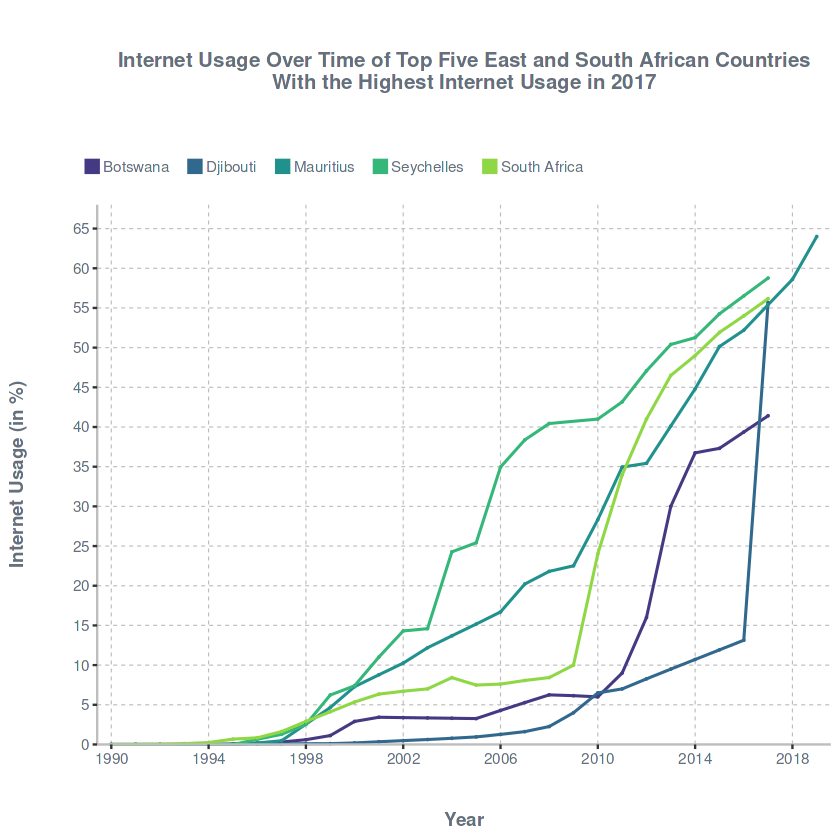

In [9]:
# Africa Eastern and Southern
top_five_internet_use_aes <- internet_with_region23 %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region %in% c('Eastern Africa', 'Southern Africa')) %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_aes

# Subset data for plot
plotData_top_five_aes <- internet %>% filter(Entity %in% top_five_internet_use_aes$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_aes,
    x = "Year",
    xlabs = "\nYear",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)\n",
    group = "Entity",
    title = "\nInternet Usage Over Time of Top Five East and South African Countries\nWith the Highest Internet Usage in 2017\n",
    title.s = 12,
    by = 5,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.2.2. Africa Western and Central 

Country,Internet_Usage
<chr>,<chr>
Cape Verde,57.16%
Gabon,50.32%
Cote d'Ivoire,43.84%
Ghana,37.88%
Sao Tome and Principe,29.93%


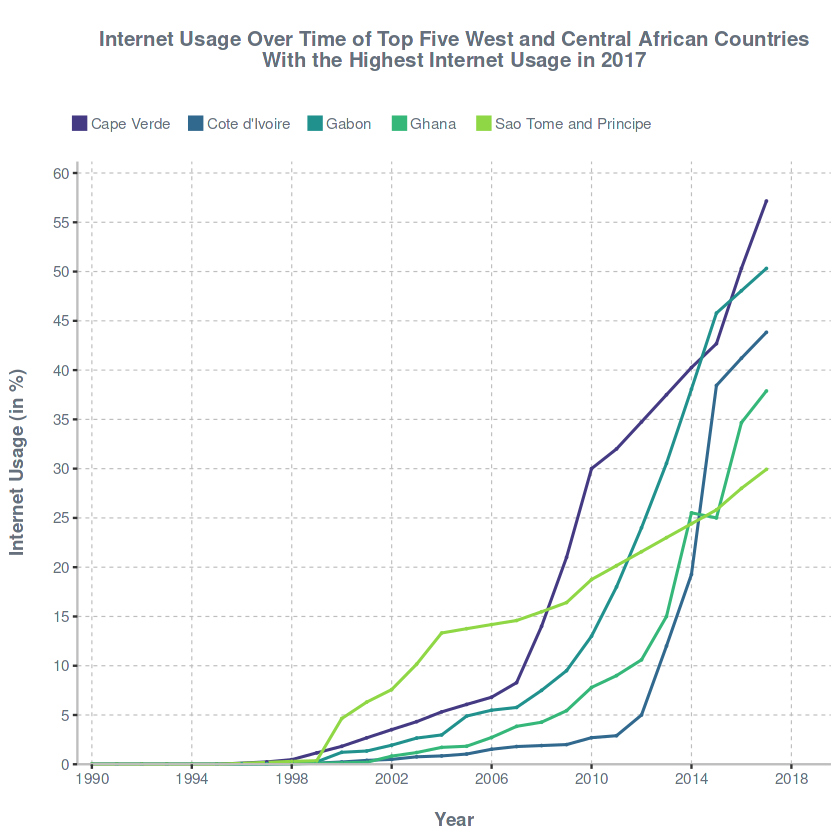

In [10]:
# Africa Western and Central
top_five_internet_use_awc <- internet_with_region23 %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region %in% c('Western Africa', 'Middle Africa')) %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_awc

# Subset data for plot
plotData_top_five_awc <- internet %>% filter(Entity %in% top_five_internet_use_awc$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_awc,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Five West and Central African Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 5,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.2.3. Latin America & Caribbean 

Country,Internet_Usage
<chr>,<chr>
Aruba,97.17%
Chile,82.33%
Barbados,81.76%
Cayman Islands,81.07%
Saint Kitts and Nevis,80.71%


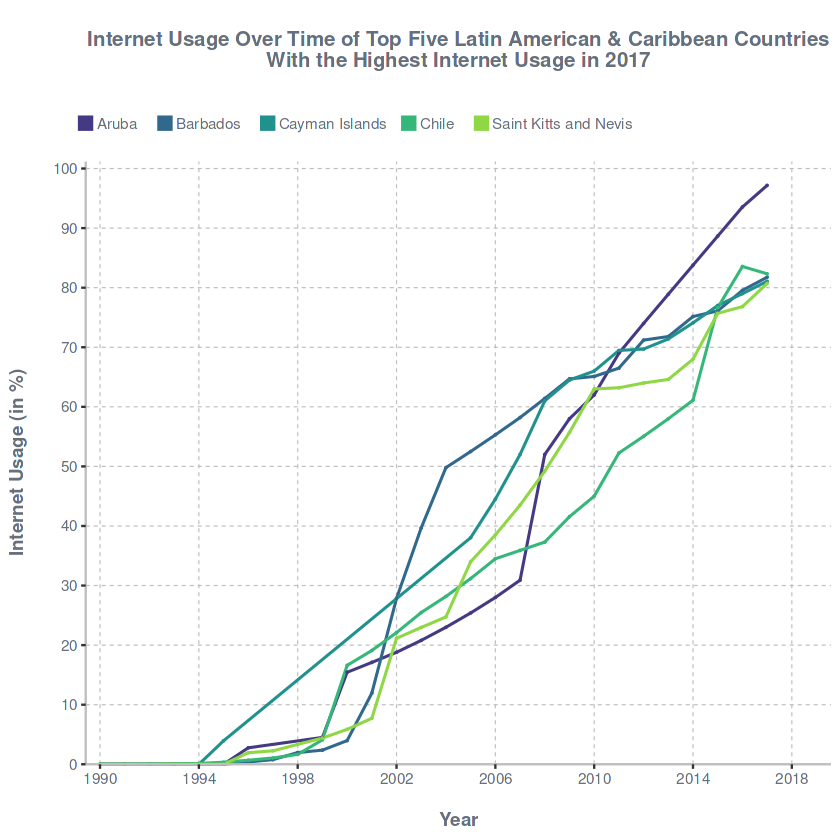

In [11]:
# Latin America & Caribbean
top_five_internet_use_lac <- internet_with_region %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'Latin America & Caribbean') %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_lac

# Subset data for plot
plotData_top_five_lac <- internet %>% filter(Entity %in% top_five_internet_use_lac$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_lac,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Five Latin American & Caribbean Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 10,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.2.4. East Asia & Pacific 

Country,Internet_Usage
<chr>,<chr>
South Korea,95.07%
Brunei,94.87%
Japan,91.73%
New Zealand,90.81%
Hong Kong,89.42%


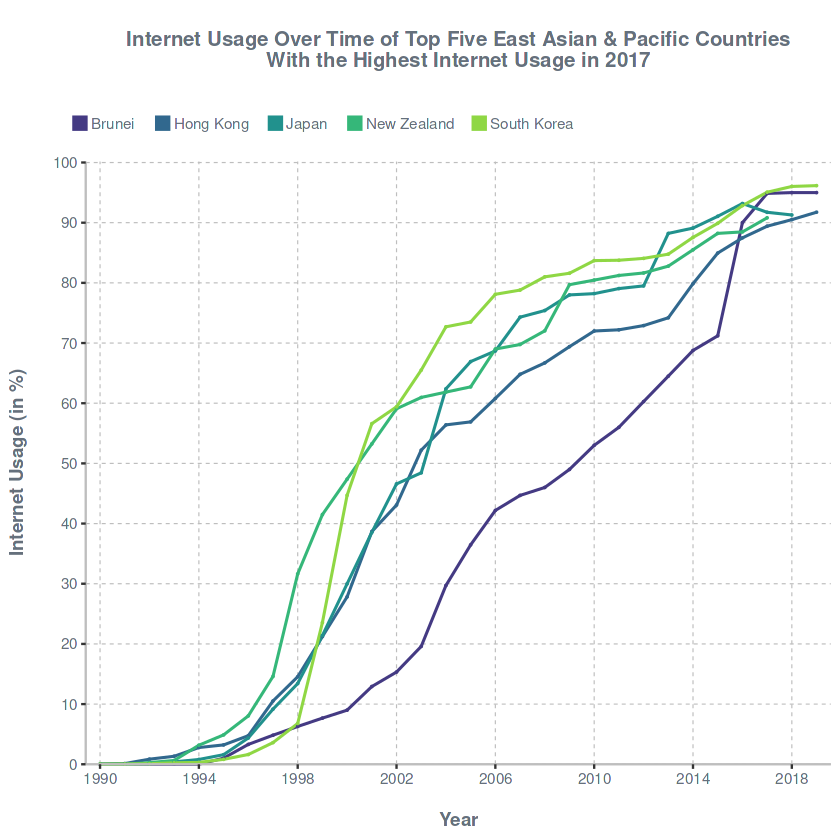

In [12]:
# East Asia & Pacific 
top_five_internet_use_eap <- internet_with_region %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'East Asia & Pacific') %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_eap

# Subset data for plot
plotData_top_five_eap <- internet %>% filter(Entity %in% top_five_internet_use_eap$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_eap,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Five East Asian & Pacific Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 10,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.2.5. South Asia 

Country,Internet_Usage
<chr>,<chr>
Maldives,63.19%
Sri Lanka,34.11%
Nepal,21.40%
Pakistan,17.11%
Afghanistan,11.45%


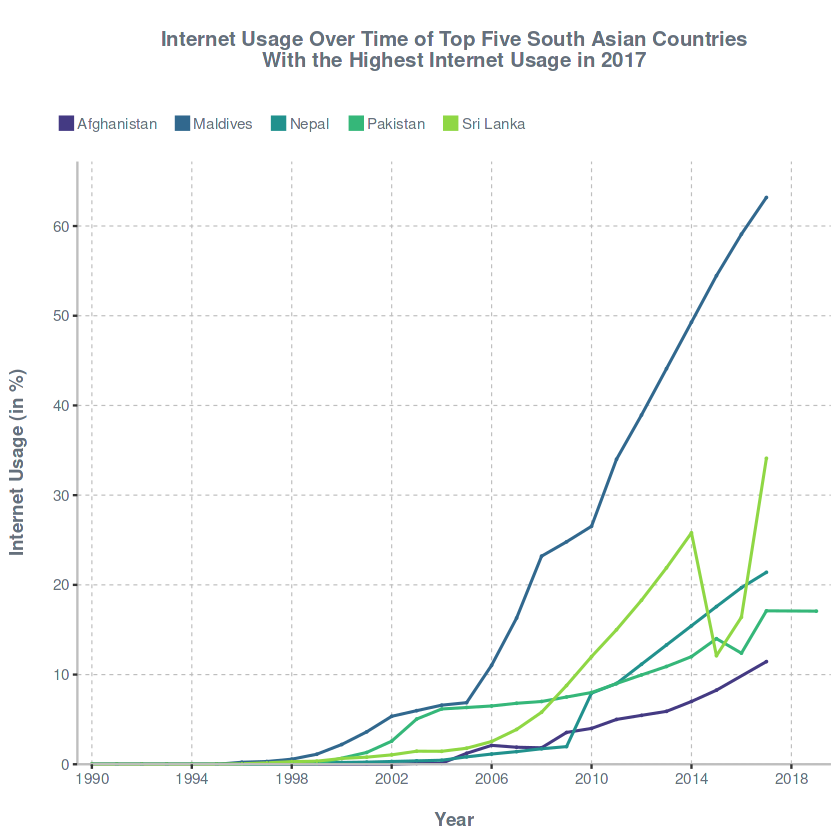

In [13]:
# South Asia
top_five_internet_use_sa <- internet_with_region %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'South Asia') %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_sa

# Subset data for plot
plotData_top_five_sa <- internet %>% filter(Entity %in% top_five_internet_use_sa$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_sa,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Five South Asian Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 10,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

#### 2.2.6. North America

Country,Internet_Usage
<chr>,<chr>
Bermuda,98.37%
Canada,92.70%
United States,87.27%


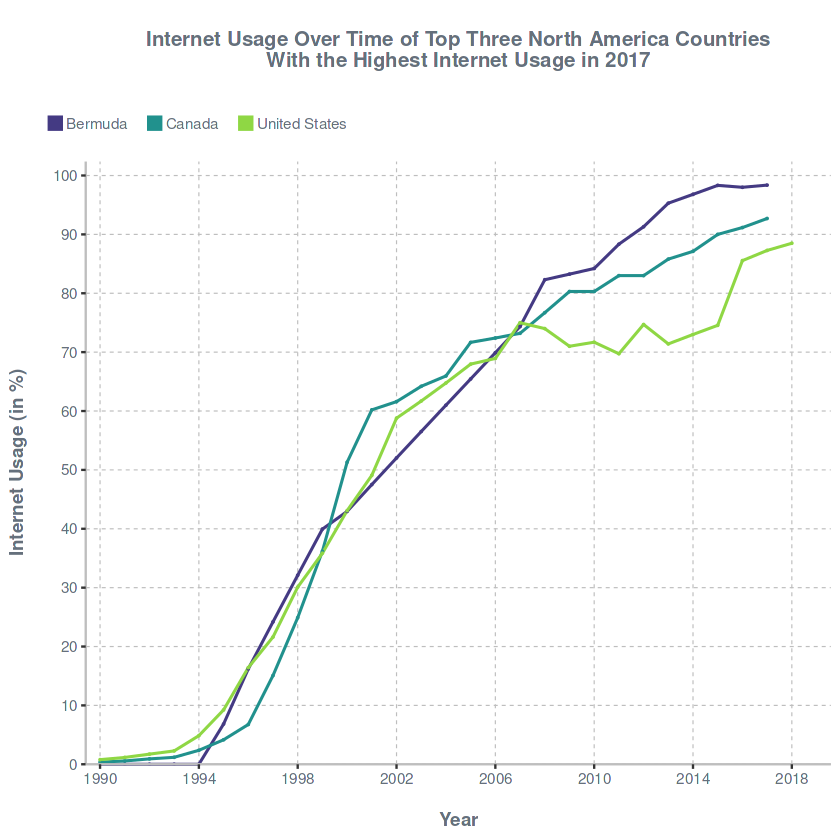

In [14]:
# North America
top_three_internet_use_na <- internet_with_region %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'North America') %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_three_internet_use_na

# Subset data for plot
plotData_top_three_na <- internet %>% filter(Entity %in% top_three_internet_use_na$Country) 

# Plot time series
plot_series(
    data = plotData_top_three_na,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Three North America Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 10,
    colors = c("#443A83", "#21918D", "#8FD744")
)

#### 2.2.7. European Union

Country,Internet_Usage
<chr>,<chr>
Luxembourg,97.36%
Denmark,97.10%
Netherlands,93.20%
Sweden,93.01%
Estonia,88.10%


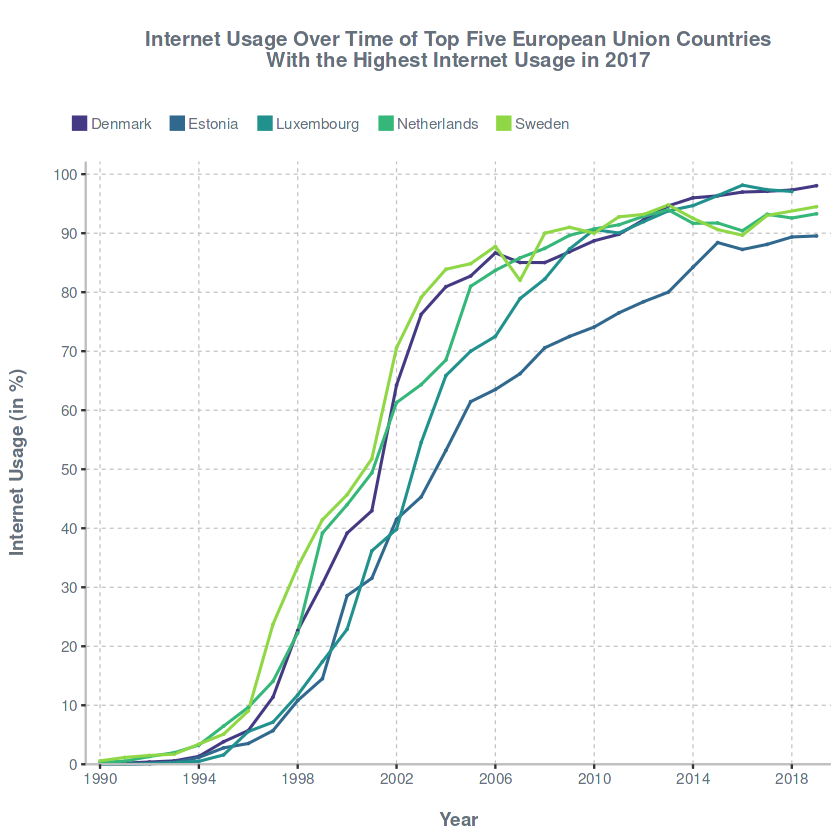

In [15]:
# EU country codes
EUCodes <- data.frame(
	Code = c('AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN',	'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'),
	Region = replicate(27, 'European Union')
)

# https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=141329
# This list was used for the country codes. As of writing, there are only twenty-seven (27) members (https://european-union.europa.eu/principles-countries-history/country-profiles_en), which means that United Kingdom was excluded from after formally leaving in 2020 (https://www.ema.europa.eu/en/about-us/history-ema/brexit-united-kingdoms-withdrawal-european-union).

# Join 'Code' from the internet and EUCodes tables to identify a country's region 
internet_eu <- merge(internet, EUCodes, by = 'Code', all = TRUE) %>%
	filter(Region == 'European Union')

# European Union
top_five_internet_use_eu <- internet_eu %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'European Union') %>%
    arrange(desc(Internet_Usage)) %>%
    ungroup() %>%
    top_n(5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename(Country = Entity)

top_five_internet_use_eu

# Subset data for plot
plotData_top_five_eu <- internet %>% filter(Entity %in% top_five_internet_use_eu$Country) 

# Plot time series
plot_series(
    data = plotData_top_five_eu,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of Top Five European Union Countries\nWith the Highest Internet Usage in 2017",
    title.s = 12,
    by = 10,
    colors = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")
)

### 2.3. Internet usage over time for these regions

- **North America** and **European Union** have **significantly the highest share of individuals who have used the internet** among the seven regions. We can observe from the graph their **immensely rapid increase** in **internet usage over time**.
- **Latin America & Caribbean** and **East Asia & Pacific** comes in **third** and **fourth**, respectively, with their internet usages having **small deviations** over time.
- The last three regions, **South Asia**, **Africa Western and Central**, and **Africa Eastern and Southern**, were the **lowest** in terms of internet usage and **slowest** in terms of increase over time.

_**Note**: The **2015 data** was used for **'Africa Western and Central'**, while **rest of the regions** have their **2017 data**._

Region,Internet_Usage
<chr>,<chr>
North America,87.83%
European Union,78.68%
Latin America & Caribbean,62.47%
East Asia & Pacific,54.93%
South Asia,29.50%
Africa Western and Central,25.57%
Africa Eastern and Southern,21.28%


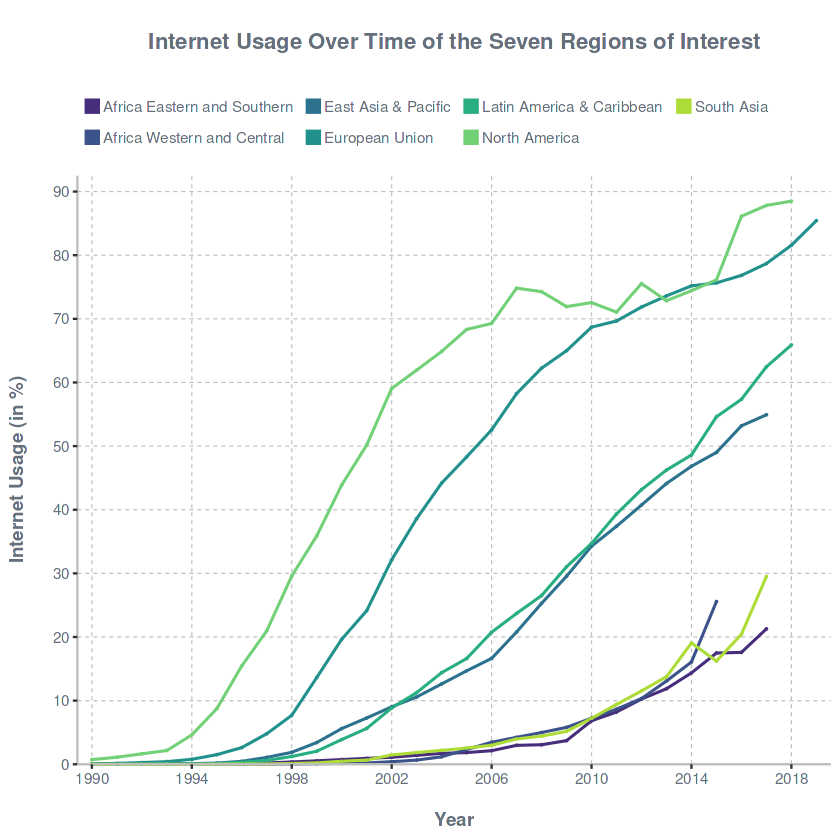

In [16]:
# Top five countries per region
highlights <- rbind(
    top_five_internet_use_aes %>% mutate(Region="Africa Eastern and Southern"),
    top_five_internet_use_awc %>% mutate(Region="Africa Western and Central"),
    top_five_internet_use_lac %>% mutate(Region="Latin America & Caribbean"),
    top_five_internet_use_eap %>% mutate(Region="East Asia & Pacific"), 
    top_five_internet_use_sa %>% mutate(Region="South Asia"),
    top_three_internet_use_na %>% mutate(Region="North America"),
    top_five_internet_use_eu %>% mutate(Region="European Union")
)

# Top country per region
top_countries <- highlights %>%
    group_by(Region) %>%
    top_n(1, Internet_Usage)

# Internet usages of regions of interest
internet_regionsOfInterest <- rbind(
    internet_with_region %>% 
    	filter(Region %in% c('Latin America & Caribbean', 
                             'East Asia & Pacific', 
                             'South Asia', 
                             'North America')),
    internet_with_region23 %>% 
    	filter(Region %in% c('Eastern Africa', 
                             'Southern Africa', 
                             'Western Africa',  
                             'Middle Africa')) %>%
        mutate(Region = ifelse(Region %in% c('Eastern Africa','Southern Africa'),
                              	'Africa Eastern and Southern', 'Africa Western and Central')),
    internet_eu
)

# Most recent data for the 'Africa Western and Central' region
most_recent_awc <- internet %>%
	filter(Year == 2015, Entity == 'Africa Western and Central')

# Seven regions' internet usages in 2017
internetUsage_regions <- internet %>%
	filter(Year == 2017, Entity %in% internet_regionsOfInterest$Region) %>%
	bind_rows(most_recent_awc) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(c("Entity", "Internet_Usage")) %>%
	rename (Region = Entity) %>%
    arrange(desc(Internet_Usage))

internetUsage_regions

# Subset data for plot
plotData_region_internet <- internet %>% filter(Entity %in% internet_regionsOfInterest$Region)

# Plot time series
plot_series(
    data = plotData_region_internet,
    x = "Year",
    xlabs = "Year",
    y = "Internet_Usage",
    ylabs = "Internet Usage (in %)",
    group = "Entity",
    title = "Internet Usage Over Time of the Seven Regions of Interest",
    title.s = 13,
    by = 10,
    colors = c("#472D7B", "#3B528B", "#2C728E", "#21918D", "#28AE80", "#72D077", "#ACDC35")
)

### 2.4. Countries with the most internet users
Based on the **[World Population Review](https://worldpopulationreview.com/countries)**, **all of these countries** are part of the **top ten (10) most populated countries**, while **four (4)** are part of the **top five (5)** (excluding Brazil).

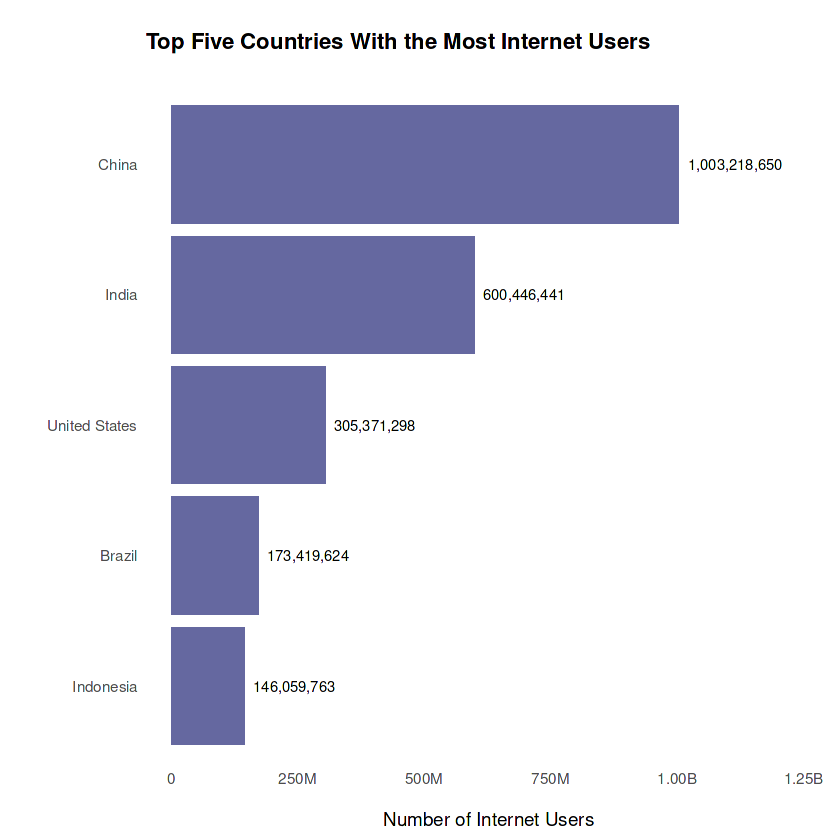

In [17]:
# Top five countries with the most internet users
top_five_internet_users <- people %>%
    group_by(Entity) %>% 
	filter(Year == max(Year), Code != 'null', Entity != 'World') %>%
    arrange(desc(Users)) %>%
    ungroup() %>%
    top_n(5, Users) %>%
	select(c("Entity", "Users"))

# Plot bar graph
plot_bar(
    data = top_five_internet_users,
    group = "Entity",
    xlabs = "Number of Internet Users",
    num = "Users",
    ylabs = "",
    title = "Top Five Countries With the Most Internet Users",
    title.s = 13
)

### 2.5. Correlation between internet usage and broadband subscriptions for 2019

- There is a **[moderately high positive correlation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/table/T1/?report=objectonly)** of **0.56** between **internet usage** and **broadband subscriptions** in **2019**.
- At a **significance level of 0.05**, we **reject** the **null hypothesis** suggesting **no true correlation (ρ)**, because the **p-value of 4.914e-07 is less than 0.05**. We are **95% confident** that the **value of ρ** is **within 0.3730** and **0.7018**.
- The scatter plot below also shows a seemingly linear positive relationship between the two variables.

      Correlation_Coefficient            P  CI_Lower  CI_Upper
Value               0.5590077 4.913904e-07 0.3730323 0.7017988


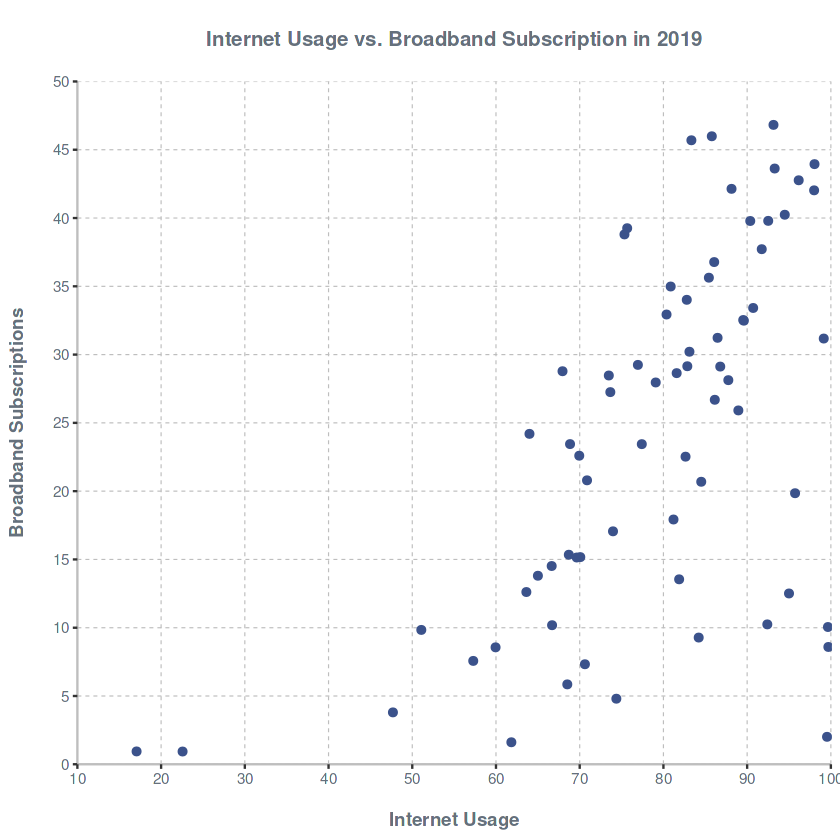

In [18]:
# Join 'internet' and 'broadband' tables
internet_and_broadband_2019 <- internet %>% 
	inner_join(broadband, by = c("Entity", "Code", "Year")) %>%
    filter(Year == 2019)

# Perform a Pearson correlation test
pearson_corr <- data.frame(
	Correlation_Coefficient = cor.test(internet_and_broadband_2019$Internet_Usage,
                        internet_and_broadband_2019$Broadband_Subscriptions,
                        method = "pearson")$estimate,
	P=cor.test(internet_and_broadband_2019$Internet_Usage,
                     internet_and_broadband_2019$Broadband_Subscriptions,
                     method = "pearson")$p.value,
	CI_Lower=(cor.test(internet_and_broadband_2019$Internet_Usage,
                       internet_and_broadband_2019$Broadband_Subscriptions,
                       method = "pearson")$conf.int)[1],
	CI_Upper=(cor.test(internet_and_broadband_2019$Internet_Usage,
                       internet_and_broadband_2019$Broadband_Subscriptions,
                       method = "pearson")$conf.int)[2]	
)

rownames(pearson_corr) <- "Value"
print(pearson_corr)

# Plot scatter points
scatter_for_corr <- ggplot(internet_and_broadband_2019, aes(x = Internet_Usage, y = Broadband_Subscriptions)) +
	geom_point(color = "#3B528B", size = 1.75) +
    theme(legend.position = "top",
        legend.justification = -0.12,
        legend.direction = "horizontal",
        legend.key.size = unit(0, 'pt'),
        legend.text = element_text(margin = margin(r = 5, unit = "pt"), color = "#65707C"),
        legend.title = element_blank(),
        legend.key = element_blank(),
        axis.title = element_text(color = "#65707C", face = "bold"),
        axis.text = element_text(color = "#65707C"),
        axis.line = element_line(colour = "grey", linewidth = 0.5),
        panel.grid.major = element_line(color = "grey", linetype = "dashed", linewidth = 0.25),
        panel.background = element_blank(),
        plot.title = element_text(color = "#65707C",
                                  hjust = 0.5,
                                  size = 12,
                                  face = "bold")
        ) +
	labs(x = '\nInternet Usage', y = 'Broadband Subscriptions\n') +
	ggtitle("\nInternet Usage vs. Broadband Subscription in 2019\n") +
	scale_x_continuous(expand = c(0.00, 0),
                       limits = c(10, 100), 
                       breaks = seq(10, 100, by = 10)) +
	scale_y_continuous(expand = c(0.00, 0),
                       limits = c(0, 50),
                       breaks = seq(0, 50, by = 5))

scatter_for_corr

## 3. Conclusions
Using the available data and results of their analyses, the following conclusions can be drawn about the global state of internet accessibility:

- Several **Middle Eastern countries** have the **highest internet usage** by population share in the world.
- **Western world regions** experienced a **much quicker growth in internet accessibility** than its eastern counterparts.
- **Top countries per region** in terms of **internet usage** may **not have large land areas**.
- On the other hand, **top countries in the highest population ranking** will likely have the **greatest number of internet users**.
- **Entities** with **increased percentage of internet users** in their population had **increased fixed subscriptions** to high-speed internet at downstream speeds >= 256 kbit/s in **2019**.